In [1]:

from keras.models import Sequential
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
test_data.head()


,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [6]:
train_id=list(train_data['ID'])

In [7]:
test_id=list(test_data['ID'])

In [8]:
train_labels=list(train_data['Class'])

In [9]:
original_dir='C:\\Users\\mahe\\Desktop\\CNN'
base_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG'
#os.mkdir(base_dir)

In [10]:
train_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG\\Train'
#os.mkdir(train_dir)
test_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG\\Test'
#os.mkdir(test_dir)

In [11]:
train_young_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG\\Train\\YOUNG'
#os.mkdir(train_young_dir)
train_middle_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG\\Train\\MIDDLE'
#os.mkdir(train_middle_dir)
train_old_dir='C:\\Users\\mahe\\Desktop\\CNN\\AUG\\Train\\OLD'
#os.mkdir(train_old_dir)

In [71]:
# originial_dir_train='C:\\Users\\mahe\\Desktop\\CNN\\Train'
# for i in range(len(train_id)):
#     if train_labels[i]=='YOUNG':
#         src=os.path.join(originial_dir_train,train_id[i])
#         dst=os.path.join(train_young_dir,train_id[i])
#         shutil.copyfile(src,dst)
#     elif train_labels[i]=='MIDDLE':
#         src=os.path.join(originial_dir_train,train_id[i])
#         dst=os.path.join(train_middle_dir,train_id[i])
#         shutil.copyfile(src,dst)
#     elif train_labels[i]=='OLD':
#         src=os.path.join(originial_dir_train,train_id[i])
#         dst=os.path.join(train_old_dir,train_id[i])
#         shutil.copyfile(src,dst)

In [12]:
len(os.listdir(train_old_dir))
len(os.listdir(train_middle_dir))
len(os.listdir(train_young_dir))

6706

In [13]:
model=Sequential()
model.add(layers.InputLayer(input_shape=(48,48,3)))
model.add(layers.Conv2D(128,(5,5),activation='relu',input_shape=(48,48,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=512,
        class_mode='categorical')

Found 19906 images belonging to 3 classes.


In [17]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (512, 48, 48, 3)
labels batch shape: (512, 3)


In [18]:
hist=model.fit_generator(
      train_generator,
    steps_per_epoch=39,
      epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
39/39 [==============================] - 133s 3s/step - loss: 0.9606 - acc: 0.5330
Epoch 2/50
39/39 [==============================] - 125s 3s/step - loss: 0.8598 - acc: 0.5970
Epoch 3/50
39/39 [==============================] - 118s 3s/step - loss: 0.7654 - acc: 0.6607
Epoch 4/50
39/39 [==============================] - 117s 3s/step - loss: 0.7213 - acc: 0.6860
Epoch 5/50
39/39 [==============================] - 118s 3s/step - loss: 0.6907 - acc: 0.6958
Epoch 6/50
39/39 [==============================] - 118s 3s/step - loss: 0.6623 - acc: 0.7141
Epoch 7/50
39/39 [==============================] - 118s 3s/step - loss: 0.6291 - acc: 0.7303
Epoch 8/50
39/39 [==============================] - 118s 3s/step - loss: 0.6092 - acc: 0.7415
Epoch 9/50
39/39 [==============================] - 118s 3s/step - loss: 0.5654 - acc: 0.7618
Epoch 10/50
39/39 [==============================] - 118s 3s/step - loss: 0.5344 - acc: 0.7761
Epoch 11/50

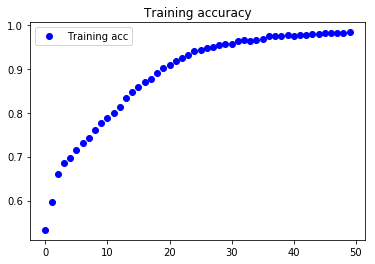

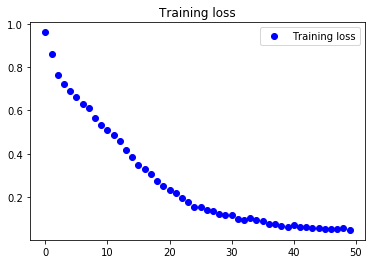

In [19]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
loss = hist.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=512,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=39,
      epochs=150)


Found 19906 images belonging to 3 classes.
Epoch 1/150
39/39 [==============================] - 121s 3s/step - loss: 1.0096 - acc: 0.5691
Epoch 2/150
39/39 [==============================] - 119s 3s/step - loss: 0.8587 - acc: 0.6015
Epoch 3/150
39/39 [==============================] - 122s 3s/step - loss: 0.8234 - acc: 0.6206
Epoch 4/150
39/39 [==============================] - 133s 3s/step - loss: 0.8039 - acc: 0.6286
Epoch 5/150
39/39 [==============================] - 123s 3s/step - loss: 0.7784 - acc: 0.6453
Epoch 6/150
39/39 [==============================] - 119s 3s/step - loss: 0.7518 - acc: 0.6635
Epoch 7/150
39/39 [==============================] - 118s 3s/step - loss: 0.7339 - acc: 0.6749
Epoch 8/150
39/39 [==============================] - 118s 3s/step - loss: 0.7223 - acc: 0.6783
Epoch 9/150
39/39 [==============================] - 119s 3s/step - loss: 0.7095 - acc: 0.6850
Epoch 10/150
39/39 [==============================] - 118s 3s/step - loss: 0.6959 - acc: 0.6914
Epoch 

Epoch 86/150
39/39 [==============================] - 120s 3s/step - loss: 0.4910 - acc: 0.7959
Epoch 87/150
39/39 [==============================] - 119s 3s/step - loss: 0.4833 - acc: 0.7988
Epoch 88/150
39/39 [==============================] - 118s 3s/step - loss: 0.4911 - acc: 0.7972
Epoch 89/150
39/39 [==============================] - 119s 3s/step - loss: 0.4811 - acc: 0.7994
Epoch 90/150
39/39 [==============================] - 119s 3s/step - loss: 0.4815 - acc: 0.8015
Epoch 91/150
39/39 [==============================] - 119s 3s/step - loss: 0.4797 - acc: 0.8010
Epoch 92/150
39/39 [==============================] - 119s 3s/step - loss: 0.4802 - acc: 0.8016
Epoch 93/150
39/39 [==============================] - 119s 3s/step - loss: 0.4786 - acc: 0.8015
Epoch 94/150
39/39 [==============================] - 126s 3s/step - loss: 0.4825 - acc: 0.8022
Epoch 95/150
39/39 [==============================] - 119s 3s/step - loss: 0.4768 - acc: 0.8057
Epoch 96/150
39/39 [====================

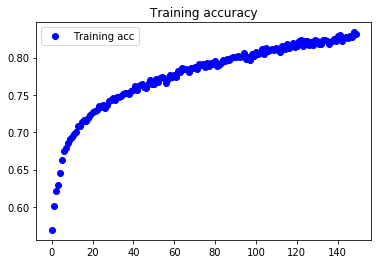

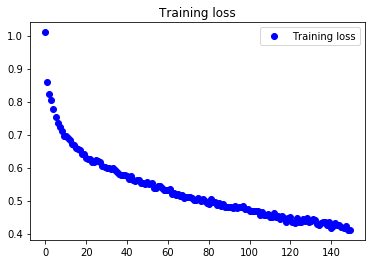

In [21]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [23]:
def gettingImages(id,path):
    sample_array=[]
    for i in range(len(id)):
        img_path=path+id[i]
        img=load_img(img_path,target_size=(48,48))
        sample_array.append(image.img_to_array(img))
    return sample_array

In [24]:
test_features=gettingImages(test_id,'Test/')


In [25]:
test_features=np.array(test_features)

In [26]:
test_features=test_features/255

In [27]:
from sklearn.preprocessing import LabelEncoder
import keras

lb=LabelEncoder()
train_label_sample= keras.utils.np_utils.to_categorical(lb.fit_transform(train_labels))
train_label_sample[:10]


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [28]:
predict=model.predict_classes(test_features)
predict

array([0, 2, 2, ..., 0, 0, 2], dtype=int64)

In [29]:
answers=lb.inverse_transform(predict)

In [30]:
answers

array(['MIDDLE', 'YOUNG', 'YOUNG', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [31]:
import pandas as pd
df1=pd.DataFrame(test_id,columns=['ID'])
df2=pd.DataFrame(answers,columns=['Class'])
output=pd.concat([df1,df2],axis=1)
output.to_csv('output_with_DA.csv',index=False)

In [38]:
output.tail(10)
#output.info()

,ID,Class
6626,16049.jpg,MIDDLE
6627,13461.jpg,YOUNG
6628,147.jpg,MIDDLE
6629,22636.jpg,MIDDLE
6630,6512.jpg,MIDDLE
6631,1876.jpg,MIDDLE
6632,14940.jpg,MIDDLE
6633,3638.jpg,MIDDLE
6634,376.jpg,MIDDLE
6635,9357.jpg,YOUNG


In [33]:
# import random
# from scipy.misc import imread
# i = random.choice(test_data.ID)
# img_name = test_data.ID[i]
# img = im.read(os.path.join('C:\\Users\\mahe\\Desktop\\CNN\\Test',img_name))
# im.show(img)